In [2]:
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
os.chdir(parent_dir)

In [3]:
import importlib
import torch.multiprocessing as mp
import json
from pprint import pprint

import src.utils.gemm_utils as gutils
importlib.reload(gutils)

# Define test cases
test_suites = [
    {"world_size": 4, "tests": [{"shard_pattern": "I_J"}]},
    {"world_size": 4, "tests": [{"shard_pattern": "Ix_J"}]},
    {"world_size": 4, "tests": [{"shard_pattern": "I_Jx"}]},
    {"world_size": 4, "tests": [{"shard_pattern": "Iy_J"}]},
    {"world_size": 4, "tests": [{"shard_pattern": "I_Jy"}]},
    {"world_size": 4, "tests": [{"shard_pattern": "Ixy_J"}]},
    {"world_size": 4, "tests": [{"shard_pattern": "Ix_Jy"}]},
    {"world_size": 4, "tests": [{"shard_pattern": "Ix_Jy"}]},
    {"world_size": 4, "tests": [{"shard_pattern": "Iy_Jx"}]},
]

results = []
for suite in test_suites:
    world_size, tests = suite["world_size"], suite["tests"]
    for test in tests:
        try:
            mp.spawn(gutils.distributed_matrix_shard, args=(world_size, test), nprocs=world_size, join=True)
            pattern_name = test['shard_pattern'] or 'replicated'
            filename = f"results/matrix_shard_{world_size}gpus_{pattern_name}.json"
            with open(filename, "r") as f:
                results.append(json.load(f))
        except Exception as e:
            results.append({
                "shard_pattern": test['shard_pattern'],
                "error": str(e)
            })

pprint(results)


[{'all_ranks': [[[0.0, 1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0, 7.0],
                 [8.0, 9.0, 10.0, 11.0],
                 [12.0, 13.0, 14.0, 15.0]],
                [[0.0, 1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0, 7.0],
                 [8.0, 9.0, 10.0, 11.0],
                 [12.0, 13.0, 14.0, 15.0]],
                [[0.0, 1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0, 7.0],
                 [8.0, 9.0, 10.0, 11.0],
                 [12.0, 13.0, 14.0, 15.0]],
                [[0.0, 1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0, 7.0],
                 [8.0, 9.0, 10.0, 11.0],
                 [12.0, 13.0, 14.0, 15.0]]],
  'local_shapes': [[4, 4], [4, 4], [4, 4], [4, 4]],
  'mesh_shape': [2, 2],
  'placements': ['Replicate', 'Replicate'],
  'shard_pattern': 'I_J'},
 {'all_ranks': [[[0.0, 1.0, 2.0, 3.0], [4.0, 5.0, 6.0, 7.0]],
                [[8.0, 9.0, 10.0, 11.0], [12.0, 13.0, 14.0, 15.0]],
                [[0.0, 1.0, 2.0, 3.0], [4.0, 5.0, 6.0, 7.0]],
        

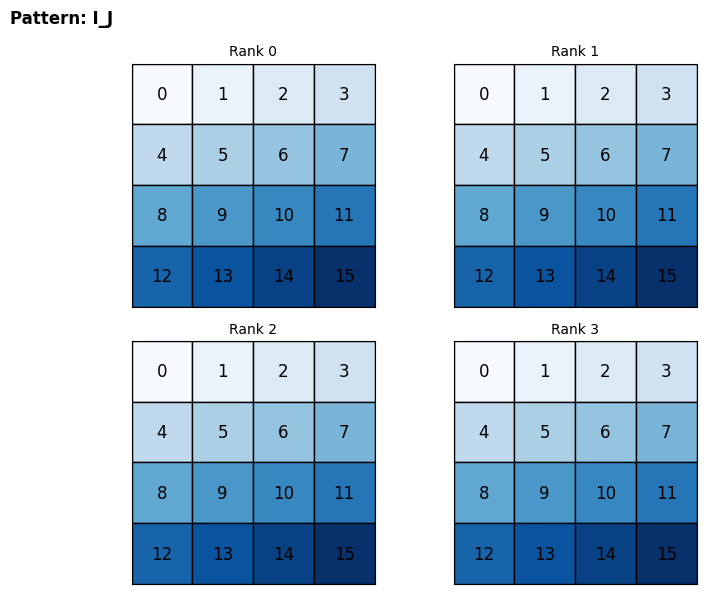

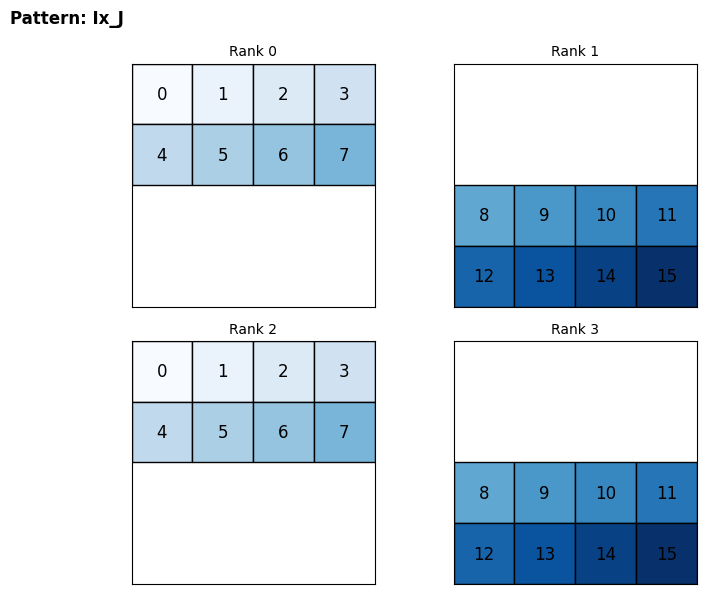

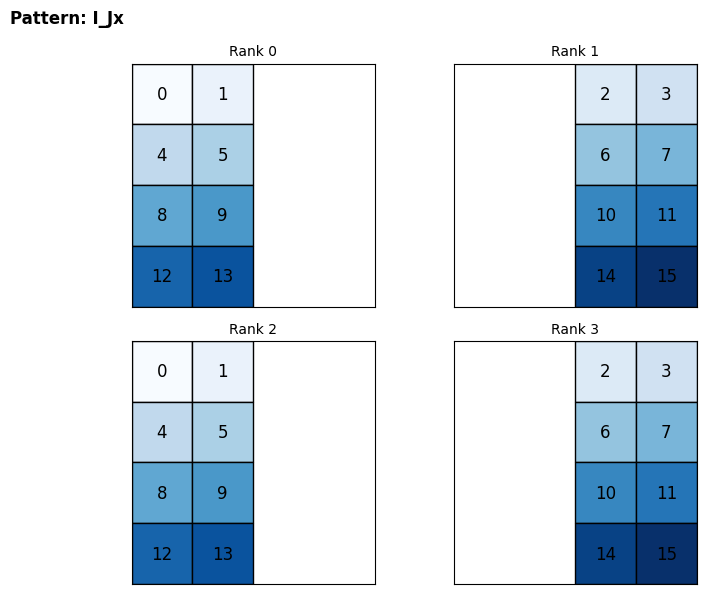

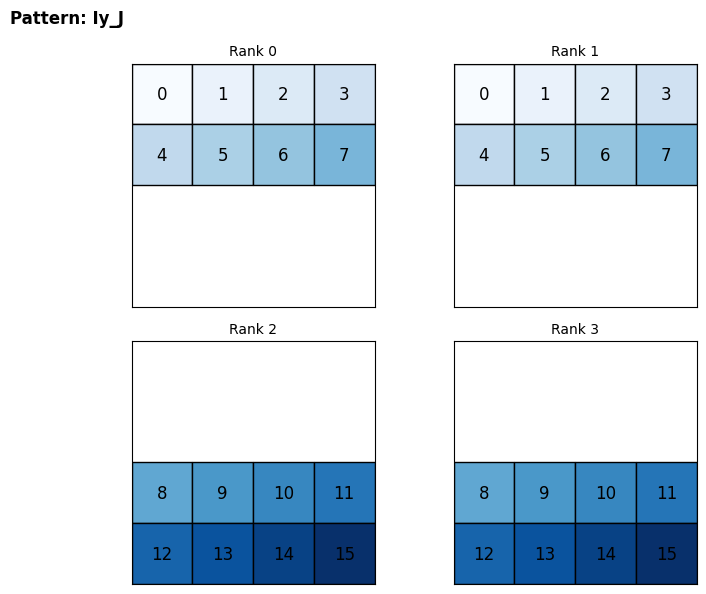

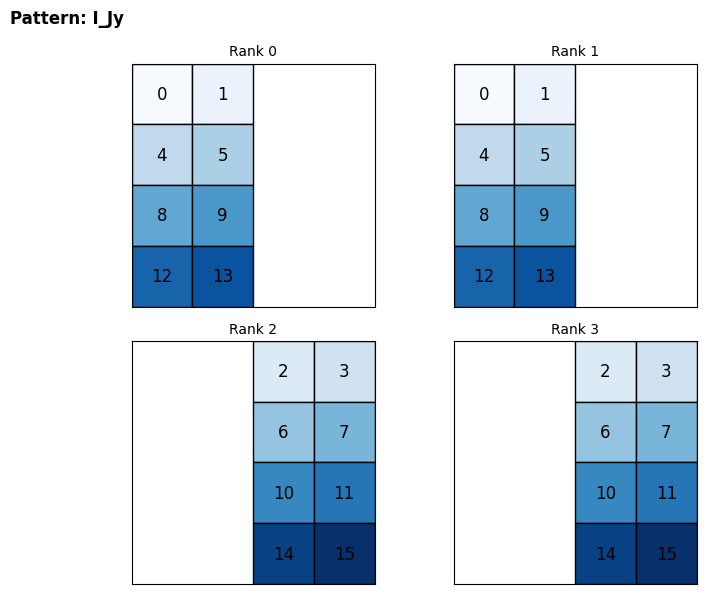

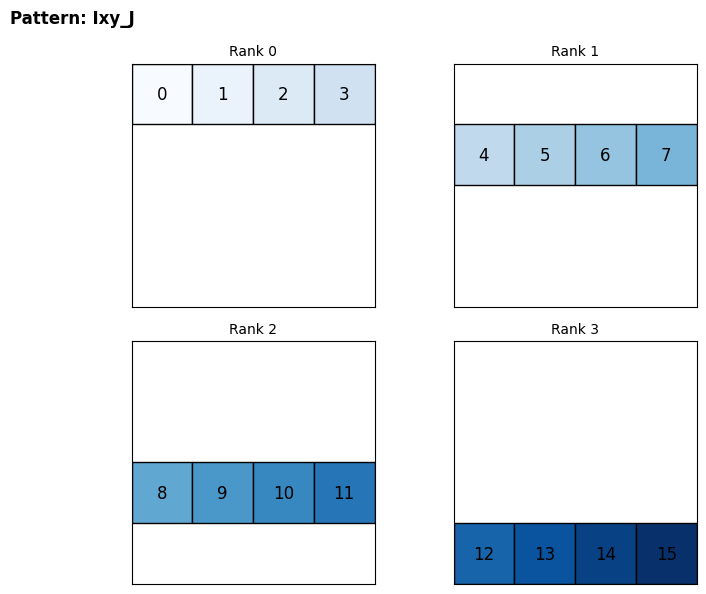

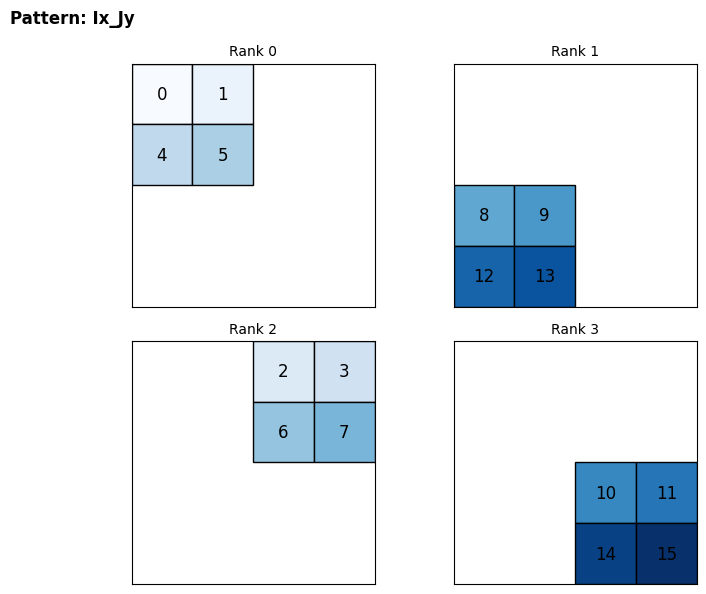

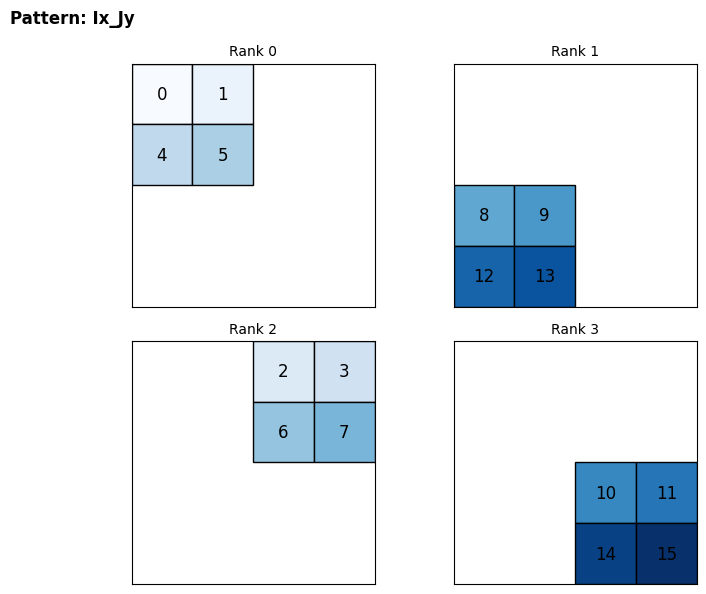

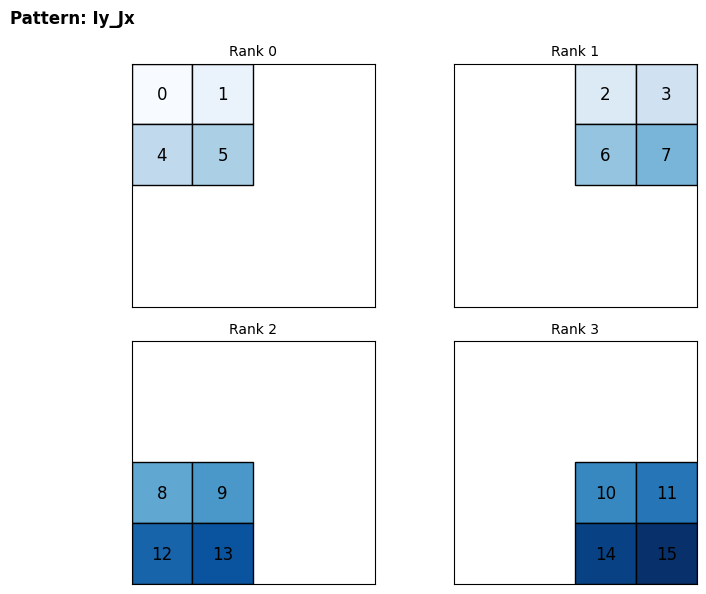

In [4]:
import src.utils.plot_utils as putils
importlib.reload(putils)

# Loop through results and visualize each with aligned shard plots
for result in results:
    pattern = result.get("shard_pattern", "") or "replicated"
    if "error" in result:
        print(f"❌ Pattern: {pattern} — Error: {result['error']}")
    else:
        putils.plot_shards_aligned(result, title_prefix="Pattern")


In [6]:
import src.utils.plot_utils as putils
importlib.reload(putils)

putils.launch_flashcard_quiz(results)
